# Prediction Using Logistic Regression

### Importing required Packages and Importing Dataset

In [1]:
#import required packages
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#import required dataset into pandas dataframe
data = pd.read_csv("E:\Datasets\SUV_Purchase.csv")

In [3]:
#obtaining information on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
#obtaining described information on dataset 
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
#printing dataset observations
print("Columns present in dataset : ",list(data))
data.head()

Columns present in dataset :  ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Presenting the Data

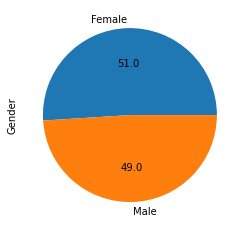

In [6]:
#present the Gender column using pie chart 
data.Gender.value_counts().plot(kind='pie',autopct='%.1f')

Text(0.75, 0.04, 'Salary')

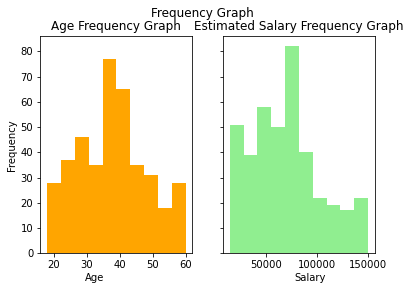

In [7]:
#present the Frequency Distribution of Age and Estimated Salary
#form horizontally stacked subplots with common Y-axis
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)

#histogram for Age frequency
ax1.hist([age for age in data['Age']], 10, color='orange')
#histogram for Estimated Salary frequency
ax2.hist([salary for salary in data['EstimatedSalary']], 10, color='lightgreen')

#give titles and lables to both the subplots
#give title to overall subplot
fig.suptitle('Frequency Graph')
#give individual titles to subplots
ax1.set_title('Age Frequency Graph')
ax2.set_title('Estimated Salary Frequency Graph')
#give labels to the plots
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
fig.text(0.25, 0.04, 'Age', ha='center', va='center')
fig.text(0.75, 0.04, 'Salary', ha='center', va='center')

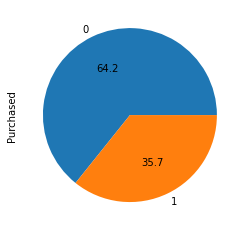

In [8]:
#present the summary of people who have purchased(1) the SUV or not(0) using pie chart 
data.Purchased.value_counts().plot(kind='pie',autopct='%.1f')

### Data Preprocessing

**Preprocessing Values for Gender Column**

In [9]:
#generate dummies for gender values
gender_dummies = pd.get_dummies(data["Gender"])
#drop one value as it is not necessary
gender_dummies.drop(['Male'],axis=1,inplace=True)
gender_dummies.head()

,Female
0,0
1,0
2,1
3,1
4,0


**Preprocessing Values for Age Column**

In [10]:
#obtain minimum and maximum value from the values in dataset
print("Minimum Age value present in dataset : ", data.Age.min())
print("Maximum Age value present in dataset : ", data.Age.max())

Minimum Age value present in dataset :  18
Maximum Age value present in dataset :  60


In [11]:
#divide data values in categories/bins and store in another column
data['Age_bins'] = pd.cut(x=data['Age'], bins=[i for i in range(15,70,5)], right=False,
                          labels=['15to19','20to24','25to29','30to34','35to39','40to44','45to49','50to54','55to59','60to64'])
#view dataset with changes
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age_bins
0,15624510,Male,19,19000,0,15to19
1,15810944,Male,35,20000,0,35to39
2,15668575,Female,26,43000,0,25to29
3,15603246,Female,27,57000,0,25to29
4,15804002,Male,19,76000,0,15to19


In [12]:
#generate dummies for age categories
age_dummies = pd.get_dummies(data['Age_bins'])
age_dummies.head()

,15to19,20to24,25to29,30to34,35to39,40to44,45to49,50to54,55to59,60to64
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


**Preprocessing for Estimated Salary Column**

In [13]:
#obtain minimum and maximum value from the values in dataset
print("Minimum EstimatedSalary value present in dataset : ", data.EstimatedSalary.min())
print("Maximum EstimatedSalary value present in dataset : ", data.EstimatedSalary.max())

Minimum EstimatedSalary value present in dataset :  15000
Maximum EstimatedSalary value present in dataset :  150000


In [14]:
#divide data values in categories/bins and store in another column
data['Salary_bins'] = pd.cut(x=data['EstimatedSalary'], bins=[i for i in range(0,150001,50000)],
                          labels=['0to50k','50kto100k','100kto150k'])
#view dataset with changes
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age_bins,Salary_bins
0,15624510,Male,19,19000,0,15to19,0to50k
1,15810944,Male,35,20000,0,35to39,0to50k
2,15668575,Female,26,43000,0,25to29,0to50k
3,15603246,Female,27,57000,0,25to29,50kto100k
4,15804002,Male,19,76000,0,15to19,50kto100k


In [15]:
#generate dummies for Estimated Salary categories
salary_dummies = pd.get_dummies(data['Salary_bins'])
salary_dummies.head()

,0to50k,50kto100k,100kto150k
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


**Form Final Preprocessed Data**

In [16]:
#Concatenate all the dummies generated and the purchased value from original dataset
frames = [gender_dummies,age_dummies,salary_dummies,data['Purchased']]
df = pd.concat(frames,axis=1)
#view dimensions and data of hence created frame
print("Dataset Shape : ", df.shape)
df.head()

Dataset Shape :  (400, 15)


,Female,15to19,20to24,25to29,30to34,35to39,40to44,45to49,50to54,55to59,60to64,0to50k,50kto100k,100kto150k,Purchased
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


### Splitting the Data

In [17]:
#separate independent and independent variable sets
X = df.drop(['Purchased'],axis=1)
Y = df['Purchased']

#Splitting the dataset into test data and train data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

### Modelling the Logistic Regression Model and Testing it

In [18]:
#create the regression object
logmodel = LogisticRegression()
#Perform Training for the hence created model
logmodel.fit(x_train,y_train)

LogisticRegression()

In [19]:
#predict the values for test data
y_predictions = logmodel.predict(x_test)

**Results for the Logistic Regression Model**

In [20]:
#obtain confusion matrix for the model
print("Confusion Matrix : ")
confusion_matrix(y_test,y_predictions)

Confusion Matrix : 


array([[49,  9],
       [ 7, 35]], dtype=int64)

In [21]:
#obtain accuracy score for the model
print("Accuracy for the Logistic Regression Model : ", accuracy_score(y_test,y_predictions))

Accuracy for the Logistic Regression Model :  0.84
